# This notebook is used for the fire-detection model

>* 1. First, we cloned the pre-trained model `yolov5`.
>* 2. Second, we fine-tuned it on fire-data from roboflow website.
>* 3. Third, we saved the model into a `.tflite` model for deployment.

#### Cloning the pre-trained model:

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone


'git' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
%%capture

#loading the libraries.

! pip install -q roboflow
import IPython
import torch
import os
from IPython.display import Image , clear_output
from roboflow import Roboflow
import matplotlib.pyplot as plt
import cv2

In [2]:
# Navigating the model directory 
%cd /content/yolov5/

/content/yolov5


In [5]:
# Specifying the dataset directory path 

os.environ["DATASET_DIRECTORY"]="/content/datasets"


### Getting the data and pre-training:

In [6]:
# downloading the data from roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your Api")
project = rf.workspace("firegassmoke").project("dataset-for-fire-and-smoke-detection")
dataset = project.version(1).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/Dataset-for-Fire-and-Smoke-Detection-1 in yolov5pytorch:: 100%|██████████| 7864/7864 [00:02<00:00, 3322.37it/s]


In [7]:
# train the data:

!python train.py --img 416 --epochs 100 --data '/content/datasets/Dataset-for-Fire-and-Smoke-Detection-1/data.yaml' --weights yolov5n.pt --cache

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.3/617.3 kB 6.5 MB/s eta 0:00:00
requirements: Ultralytics requirement ['gitpython'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.8s, installed 1 package: ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=yolov5n.pt, cfg=, data=/content/datasets/Dataset-for-Fire-and-Smoke-Detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100

> This is the training results:

![Alt text](image.png)

In [ ]:
# .... this is a train sample ....
image_path = '/content/yolov5/runs/train/exp/results.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Unable to load the image from {image_path}")
else:
    plt.figure(figsize=(15, 10))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

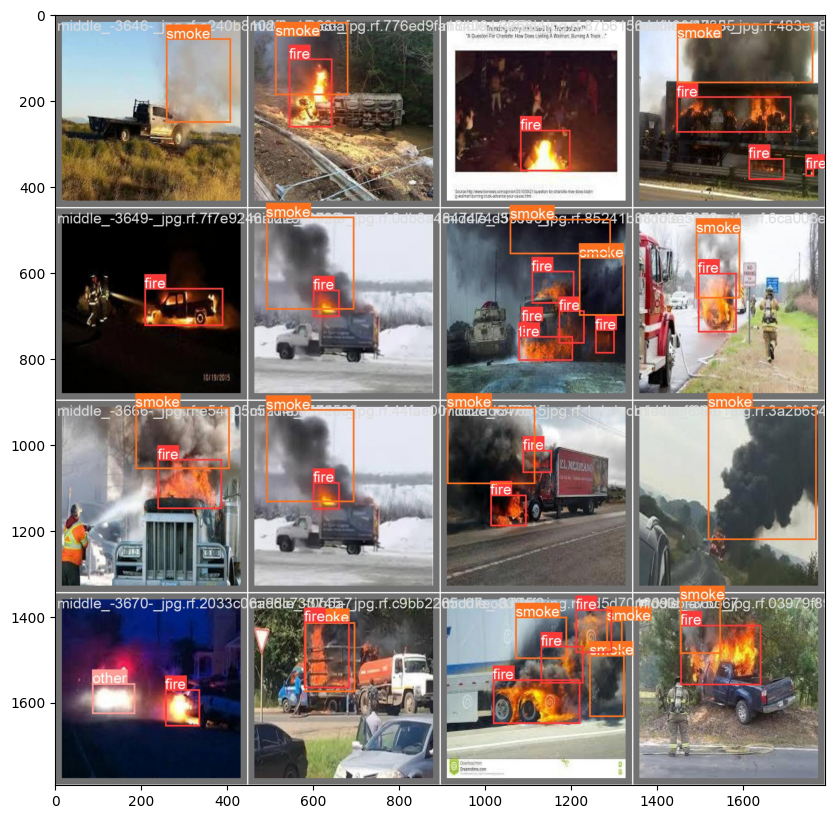

In [9]:
# .... this is a train label ....

image_path = '/content/yolov5/runs/train/exp/val_batch1_labels.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Unable to load the image from {image_path}")
else:
    plt.figure(figsize=(15, 10))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

### Used the model for sample inference:
>* We can use this `.tflite` to implement it with flutter app.    

In [10]:
!python detect.py --img 416  --weights /content/yolov5/runs/train/exp/weights/best.tflite --conf 0.1 --source /content/datasets/Dataset-for-Fire-and-Smoke-Detection-1/test/images

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/datasets/Dataset-for-Fire-and-Smoke-Detection-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs
image 1/389 /content/datasets/Dataset-for-Fire-and-Smoke-Detection-1/test/images/large_-1005-_jpg.rf.b895ae8d34565b1dabbd4d555113c8e6.jpg: 416x416 1 fire, 1 smoke, 7.3ms
image 2/389 /content/datasets/Dataset-for-Fire-and-Smoke-Detection-1/test/images/large_-1008-_jpg

# Concolusion:

In this fire-detection model, we did the following.

>* 1. First, we cloned the pre-trained model `yolov5`.
>* 2. Second, we fine-tuned it on fire-data from roboflow website.
>* 3. Third, we saved the model into a `.tflite` model for deployment.
_________________________________________________________